In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sacc

In [4]:
meta = np.load("../data/LSST/wlwl_Nzs40_meta.npz")
files = np.load("../data/LSST/wlwl_Nzs40_files.npz")
cls_jaime = np.load("Nz_cls_lsst.npz")['cls']

# Plots

In [5]:
data = meta["cls"]
err = np.sqrt(np.diag(meta["cov"]))
pairs = meta["pairs"]
idx = meta["idx"]
cls_m = np.mean(cls_jaime, 1)
cls_s = np.std(cls_jaime, 1)

## DESwl-DESwl

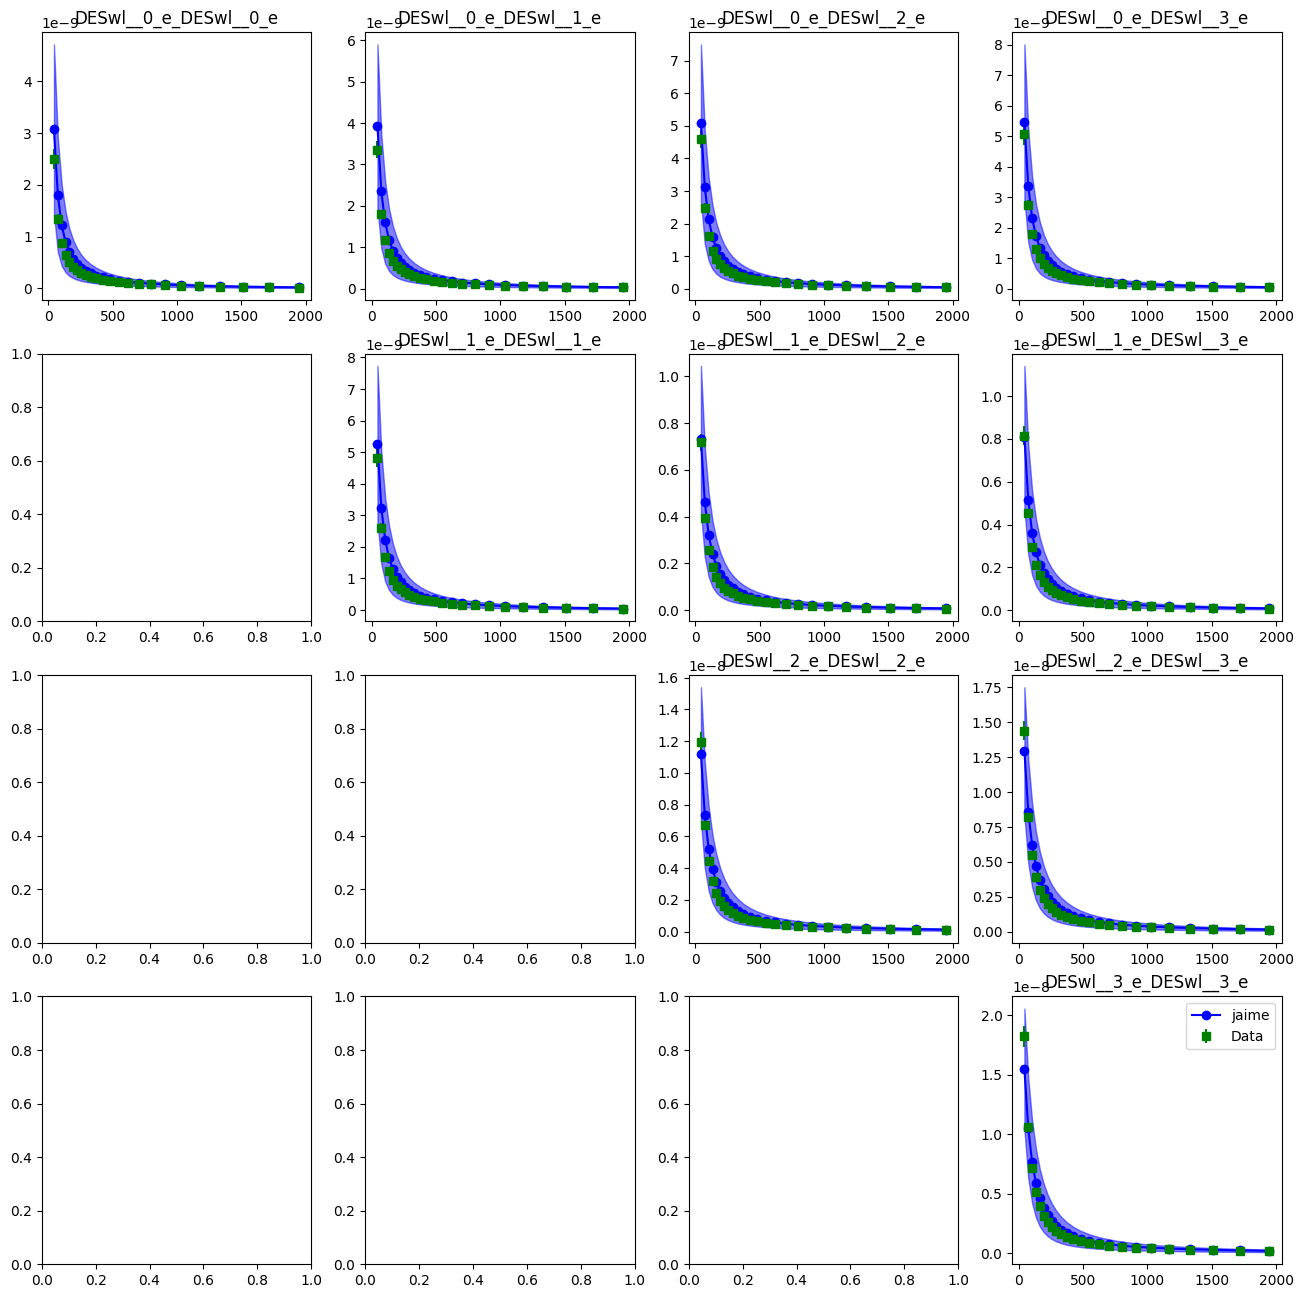

10


In [6]:
figure, axis = plt.subplots(4, 4, figsize=(16,16))
l = 0
for i in range(0,4):
    for j in range(0,4):
        if j >= i:
            t1, t2 = pairs[l][0], pairs[l][1]
            axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                         data[idx[l]:idx[l+1]], 
                         yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
            axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                            cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
            axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                            (cls_m+cls_s)[idx[l]:idx[l+1]],
                            (cls_m-cls_s)[idx[l]:idx[l+1]],
                            color="b", alpha=.5)
            #axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
            #                cls_carlos[idx[l]:idx[l+1]],
            #                "ro-", label="carlos")
            axis[i, j].set_title("{}_{}".format(t1,t2))
            l += 1
plt.legend()
plt.show()
print(l)